In [1]:
# Homework2_Semistructured data -----YODIT AYALEW
#Imported Libraries
import pandas as pd
import numpy as np
import json 
import ijson
import datetime
import matplotlib.pyplot as plt

In [2]:
#Opening Marlynad traiifc JSON file & 
#Reading first few lines from JSON file to get clue about the data
filename = "C:\IST 652\marylandtraffic.json"
N = 10
with open(filename, 'r') as f:
     for i in range(0, N):
           print(f.readline(), end = '')

{
  "meta" : {
    "view" : {
      "id" : "4mse-ku6q",
      "name" : "Traffic Violations",
      "assetType" : "dataset",
      "averageRating" : 0,
      "category" : "Public Safety",
      "createdAt" : 1403103517,
      "description" : "This dataset contains traffic violation information from all electronic traffic violations issued in the County.  Any information that can be used to uniquely identify the vehicle, the vehicle owner or the officer issuing the violation will not be published.\r\n\r\nUpdate Frequency:  Daily",


In [3]:
#exploring columns and printing the first 
#ijson  iteratively parse the json file instead of reading it all in at once. 
with open(filename, 'r') as f:
    objects = ijson.items(f, 'meta.view.columns.item')
    columns = list(objects)
print(columns[0])

{'id': -1, 'name': 'sid', 'dataTypeName': 'meta_data', 'fieldName': ':sid', 'position': 0, 'renderTypeName': 'meta_data', 'format': {}, 'flags': ['hidden']}


In [4]:
#getting column names based on above output, extract the fieldName key from each item in columns
column_names = [col["fieldName"] for col in columns]
column_names

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'seq_id',
 'date_of_stop',
 'time_of_stop',
 'agency',
 'subagency',
 'description',
 'location',
 'latitude',
 'longitude',
 'accident',
 'belts',
 'personal_injury',
 'property_damage',
 'fatal',
 'commercial_license',
 'hazmat',
 'commercial_vehicle',
 'alcohol',
 'work_zone',
 'search_conducted',
 'search_disposition',
 'search_outcome',
 'search_reason',
 'search_reason_for_stop',
 'search_type',
 'search_arrest_reason',
 'state',
 'vehicle_type',
 'year',
 'make',
 'model',
 'color',
 'violation_type',
 'charge',
 'article',
 'contributed_to_accident',
 'race',
 'gender',
 'driver_city',
 'driver_state',
 'dl_state',
 'arrest_type',
 ':@computed_region_vu5j_pcmz',
 'geolocation',
 ':@computed_region_tx5f_5em3',
 ':@computed_region_kbsp_ykn9',
 ':@computed_region_d7bw_bq6x',
 ':@computed_region_rbt8_3x7n']

In [5]:
#As there are many columns, the below are selected and defined for  the purpose of this project
selected_columns = [
    "date_of_stop",
    "time_of_stop",
    "agency",
    "subagency",
    "description",
    "location",
    "latitude",
    "longitude",
    "vehicle_type",
    "year",
    "make",
    "model",
    "color",
    "violation_type",
    "race",
    "gender",
    "driver_state",
    "driver_city",
    "dl_state",
    "arrest_type"]
trafficdata = []
with open(filename, 'r') as f:
    objects = ijson.items(f, 'data.item')
    for row in objects:
        selected_row = []
        for item in selected_columns:
            selected_row.append(row[column_names.index(item)])
            trafficdata.append(selected_row)

In [6]:
#printing the first item for checking
trafficdata[0]

['2019-08-11T00:00:00',
 '20:02:00',
 'MCP',
 '2nd District, Bethesda',
 'LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, LOCKING IGNITION, REMOVING KEY & SETTING BRAKE',
 'CORDELL ST @ NORFOLK AVE.',
 '38.9897433333333',
 '-77.09777',
 '02 - Automobile',
 '2016',
 'TOYOTA',
 'CAMRY',
 'SILVER',
 'Citation',
 'BLACK',
 'M',
 'MD',
 'SILVER SPRING',
 'MD',
 'A - Marked Patrol']

In [7]:
#Reading the JSON file data into Pandas Dataframe
trafficdata = pd.DataFrame(trafficdata, columns=selected_columns)

In [8]:
#Analysis one - lets check number of vehicle count per color
trafficdata["color"].value_counts()

BLACK          594500
SILVER         501580
WHITE          454860
GRAY           326000
RED            225220
BLUE           222380
GREEN          108900
GOLD            86700
BLUE, DARK      64400
TAN             57700
MAROON          52360
GREEN, DK       36040
BLUE, LIGHT     35920
BEIGE           33020
N/A             24100
GREEN, LGT      17320
BROWN           14520
YELLOW          12180
ORANGE          11380
PURPLE           5680
BRONZE           5580
MULTICOLOR       2140
CREAM            1900
PINK              600
COPPER            580
CAMOUFLAGE        160
CHROME             40
Name: color, dtype: int64

In [9]:
#Analysis 2: per arrest type
trafficdata["arrest_type"].value_counts()

A - Marked Patrol                         2332160
Q - Marked Laser                           352420
B - Unmarked Patrol                         93060
E - Marked Stationary Radar                 24160
G - Marked Moving Radar (Stationary)        20240
S - License Plate Recognition               16300
R - Unmarked Laser                          16220
M - Marked (Off-Duty)                       12440
O - Foot Patrol                              9200
L - Motorcycle                               8280
H - Unmarked Moving Radar (Stationary)       5580
I - Marked Moving Radar (Moving)             4080
C - Marked VASCAR                            2880
J - Unmarked Moving Radar (Moving)           2300
F - Unmarked Stationary Radar                1860
D - Unmarked VASCAR                           940
N - Unmarked (Off-Duty)                       840
P - Mounted Patrol                            480
K - Aircraft Assist                            80
Name: arrest_type, dtype: int64

In [10]:
#Analysis 3- based on  time
#time of day and the date of the stop are stored in two separate columns, time_of_stop, and date_of_stop. 
#parse both columns, and turn them into a single datetime column
def parse_full_date(row):
    date = datetime.datetime.strptime(row["date_of_stop"], "%Y-%m-%dT%H:%M:%S")
    time = row["time_of_stop"].split(":")
    date = date.replace(hour=int(time[0]), minute = int(time[1]), second = int(time[2]))
    return date
trafficdata["date"] = trafficdata.apply(parse_full_date, axis=1)

(array([378520., 478460., 443440., 424860., 440880., 737360.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 6 Patch objects>)

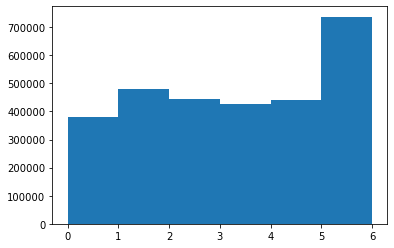

In [11]:
#plot of which days result in the most traffic stops:

plt.hist(trafficdata["date"].dt.weekday, bins=6)


(array([139220., 117860.,  98620.,  70540.,  43040.,  39380.,  49420.,
        100020., 145480., 144900., 151800., 133680., 120480., 121560.,
        126480., 113920., 155460., 162900., 129320., 107160., 116940.,
        142680., 186460., 186200.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

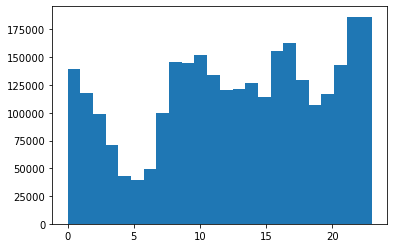

In [12]:
# plot out the most common traffic stop times:
plt.hist(trafficdata["date"].dt.hour, bins=24)

In [13]:
#filtering stops data based on date 
last_year =trafficdata[trafficdata["date"] > datetime.datetime(year=2020, month=1, day=1)]
print(last_year.shape)

(725840, 21)


In [14]:
#Stops during  rush hour since last year 
morning_rush = last_year[(last_year["date"].dt.weekday < 5) & (last_year["date"].dt.hour > 5) & (last_year["date"].dt.hour < 10)]
print(morning_rush.shape) 

(96740, 21)


In [15]:
#Analysis 4 - lets check number of stops count per gender
trafficdata["gender"].value_counts()

M    2009460
F     889220
U       4840
Name: gender, dtype: int64

(array([2009460.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
         889220.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,    4840.]),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667, 1.        , 1.08333333, 1.16666667,
        1.25      , 1.33333333, 1.41666667, 1.5       , 1.58333333,
        1.66666667, 1.75      , 1.83333333, 1.91666667, 2.        ]),
 <a list of 24 Patch objects>)

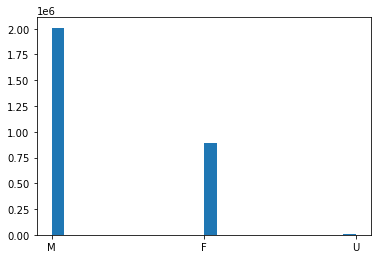

In [16]:
# plot out the most common traffic stop times:
plt.hist(trafficdata["gender"], bins=24)

In [17]:
#Analysis-5- Voilation Type  

trafficdata["violation_type"].value_counts()

Citation    2378200
Warning      501120
ESERO         24200
Name: violation_type, dtype: int64

(array([2378200.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
         501120.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,   24200.]),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667, 1.        , 1.08333333, 1.16666667,
        1.25      , 1.33333333, 1.41666667, 1.5       , 1.58333333,
        1.66666667, 1.75      , 1.83333333, 1.91666667, 2.        ]),
 <a list of 24 Patch objects>)

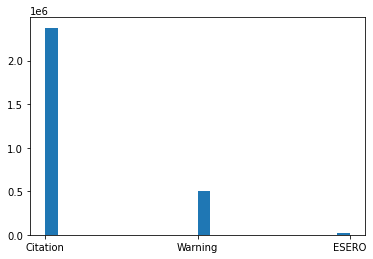

In [18]:
# plot out the most common voilation types:
plt.hist(trafficdata["violation_type"], bins=24)